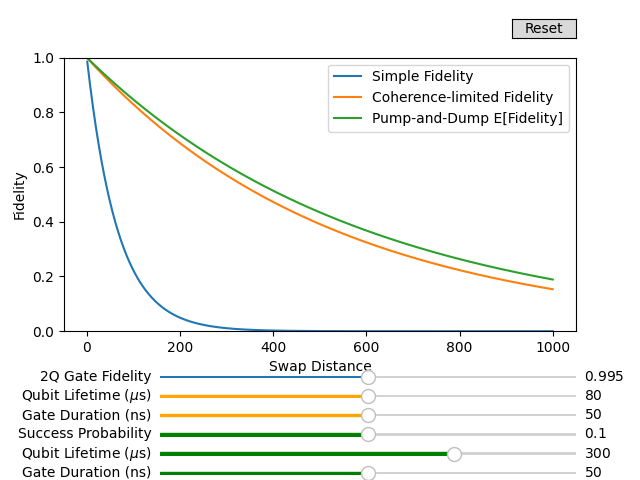

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


N= 1000
swap_distance = np.linspace(1, N, N)


# Create the figure and adjust the main plot to make room for the sliders
fig, ax = plt.subplots()
#fig.set_size_inches(8,12)
plt.subplots_adjust(left=0.1, bottom=0.31)

###Simple Line
def simple(gate_2q_fidelity):
    return (gate_2q_fidelity**3) ** swap_distance

# Define initial parameters
init_gate_2q_fidelity= .995

# Create the line that we will manipulate
simple_line, = ax.plot(swap_distance, simple(init_gate_2q_fidelity), label="Simple Fidelity")

# Make a horizontal slider.
ax_2q_f = plt.axes([0.25, 0.21, 0.65, 0.01])
slider_2q_f = Slider(
    ax=ax_2q_f,
    label='2Q Gate Fidelity',
    valmin=0.99,
    valmax=1,
    valstep=.0005,
    valinit=init_gate_2q_fidelity,
)

### Coherence-limited Fidelity Line
def coherence_fidelity(qubit_lifetime, gate_2q_duration):
    return np.exp(-3*(gate_2q_duration*10**-9)*swap_distance/(qubit_lifetime*10**-6))

# Define initial parameters
init_qubit_lifetime = 80
init_gate_2q_duration = 50

coherence_line, = ax.plot(swap_distance, coherence_fidelity(init_qubit_lifetime, init_gate_2q_duration), label="Coherence-limited Fidelity")

# Make a horizontal slider
ax_co_f = plt.axes([0.25, 0.17, 0.65, 0.01])
slider_lifetime1 = Slider(
    ax=ax_co_f,
    label='Qubit Lifetime ($\mu$s)',
    valmin=60,
    valmax=100,
    valstep=5,
    valinit=init_qubit_lifetime,
    color='orange'
)

# Make a horizontal slider
ax_dur = plt.axes([0.25, 0.13, 0.65, 0.01])
slider_duration1 = Slider(
    ax=ax_dur,
    label='Gate Duration (ns)',
    valmin=20,
    valmax=80,
    valstep=5,
    valinit=init_gate_2q_duration,
    color='orange'
)

### "Pump-and-Dump" Fidelity Line
def pump_and_dump(success_probability, qubit_lifetime, gate_2q_duration):
    #expected number of trails is 1/p
    expected_trials = 1/success_probability
    return np.exp(-expected_trials*(gate_2q_duration*10**-9)*swap_distance/(qubit_lifetime*10**-6))

# Define initial parameters
init_success_probability = .1 # Low success probability
init_qubit_lifetime2 = 300 # Although Rob has longer lifetimes
init_gate_2q_duration2 = 50

pad_line, = ax.plot(swap_distance, pump_and_dump(init_success_probability, init_qubit_lifetime2, init_gate_2q_duration2), label="Pump-and-Dump E[Fidelity]")

# Make a horizontal slider

ax_co_f = plt.axes([0.25, 0.09, 0.65, 0.01])
slider_lifetime2 = Slider(
    ax=ax_co_f,
    label='Success Probability',
    valmin=0,
    valmax=.2,
    valstep=.01,
    valinit=init_success_probability,
    color='green'
)

ax_s = plt.axes([0.25, 0.05, 0.65, 0.01])
slider_success = Slider(
    ax=ax_s,
    label='Qubit Lifetime ($\mu$s)',
    valmin=60,
    valmax=400,
    valstep=5,
    valinit=init_qubit_lifetime2,
    color='green'
)

# Make a horizontal slider
ax_dur = plt.axes([0.25, 0.01, 0.65, 0.01])
slider_duration2 = Slider(
    ax=ax_dur,
    label='Gate Duration (ns)',
    valmin=20,
    valmax=80,
    valstep=5,
    valinit=init_gate_2q_duration2,
    color='green'
)


# The function to be called anytime a slider's value changes
def update1(val):
    simple_line.set_ydata(simple(slider_2q_f.val))
    fig.canvas.draw_idle()
def update2(val):
    coherence_line.set_ydata(coherence_fidelity(slider_lifetime1.val, slider_duration1.val))
    fig.canvas.draw_idle()
def update3(val):
    pad_line.set_ydata(pump_and_dump(slider_success.val, slider_lifetime2.val, slider_duration2.val))
    fig.canvas.draw_idle()

# register the update function with each slider
slider_2q_f.on_changed(update1)
slider_lifetime1.on_changed(update2)
slider_duration1.on_changed(update2)
slider_lifetime2.on_changed(update3)
slider_duration2.on_changed(update3)
slider_success.on_changed(update3)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, .92, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    slider_2q_f.reset()
    slider_lifetime1.reset()
    slider_duration1.reset()
    slider_lifetime2.reset()
    slider_duration2.reset()
    slider_success.reset()

button.on_clicked(reset)

ax.set_ybound(0, 1)
ax.set_xlabel('Swap Distance')
ax.set_ylabel('Fidelity')
ax.legend()
plt.show()